In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [27]:
from tensorflow import keras
import numpy as np
from functions import build_model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
#dividindo por 255 para escalar os pixels entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
#hidden_layer_size = [8, 16, 32, 64, 128, 256]
#learning_rate = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5]
hidden_layer_size = [8, 64, 256]
learning_rate = [0.001, 0.01, 0.05]
activation = ["relu"]

In [9]:
best_sz, best_lr, best_func = 0, 0, ""
best_acc = 0

In [11]:
for sz in hidden_layer_size:
    for lr in learning_rate:
        for func in activation:
            
            model = build_model(sz, lr, func)
            model.fit(X_train, y_train, epochs=10)
            y_pred = np.argmax(model.predict(X_valid), axis=-1)
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy > best_acc:
                best_acc = accuracy
                best_sz, best_lr, best_func = sz, lr, func

Epoch 1/10
1719/1719 [==============================] - 5s 1ms/step - loss: 2.1577 - accuracy: 0.2463
Epoch 2/10
1719/1719 [==============================] - 2s 941us/step - loss: 1.6571 - accuracy: 0.4541
Epoch 3/10
1719/1719 [==============================] - 2s 903us/step - loss: 1.3306 - accuracy: 0.6096
Epoch 4/10
1719/1719 [==============================] - 2s 935us/step - loss: 1.0949 - accuracy: 0.6937
Epoch 5/10
1719/1719 [==============================] - 2s 918us/step - loss: 0.9427 - accuracy: 0.7350
Epoch 6/10
1719/1719 [==============================] - 2s 943us/step - loss: 0.8446 - accuracy: 0.7615
Epoch 7/10
1719/1719 [==============================] - 2s 933us/step - loss: 0.7663 - accuracy: 0.7862
Epoch 8/10
1719/1719 [==============================] - 2s 942us/step - loss: 0.7142 - accuracy: 0.7997
Epoch 9/10
1719/1719 [==============================] - 2s 921us/step - loss: 0.6646 - accuracy: 0.8137
Epoch 10/10
1719/1719 [==============================] - 2s 920us/

In [11]:


#just to avoid grid search redo
best_sz = 256
best_lr = 0.05
best_func = 'relu'

print(best_sz, best_lr, best_func)

256 0.05 relu


In [12]:
final_model = build_model(best_sz, best_lr, best_func)

In [13]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5820 - accuracy: 0.8460 - val_loss: 0.2101 - val_accuracy: 0.9426
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2130 - accuracy: 0.9411 - val_loss: 0.1582 - val_accuracy: 0.9562
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1567 - accuracy: 0.9555 - val_loss: 0.1285 - val_accuracy: 0.9666
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1219 - accuracy: 0.9660 - val_loss: 0.1146 - val_accuracy: 0.9684
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0982 - accuracy: 0.9721 - val_loss: 0.1025 - val_accuracy: 0.9728
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0867 - accuracy: 0.9760 - val_loss: 0.0918 - val_accuracy: 0.9742
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0764 - accuracy: 0.9797 - val_loss: 0.0851 - val_accuracy:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df_losses = pd.DataFrame(history.history)
df_losses

,loss,accuracy,val_loss,val_accuracy
0,0.370061,0.898982,0.210125,0.9426
1,0.197763,0.944055,0.158171,0.9562
2,0.147909,0.958127,0.128513,0.9666
3,0.118838,0.966709,0.114582,0.9684
4,0.099669,0.972018,0.102463,0.9728
5,0.085512,0.976218,0.091843,0.9742
6,0.074063,0.980127,0.085059,0.9760
7,0.065387,0.982018,0.081108,0.9772
8,0.058114,0.984109,0.075537,0.9782
9,0.052016,0.986327,0.073618,0.9778


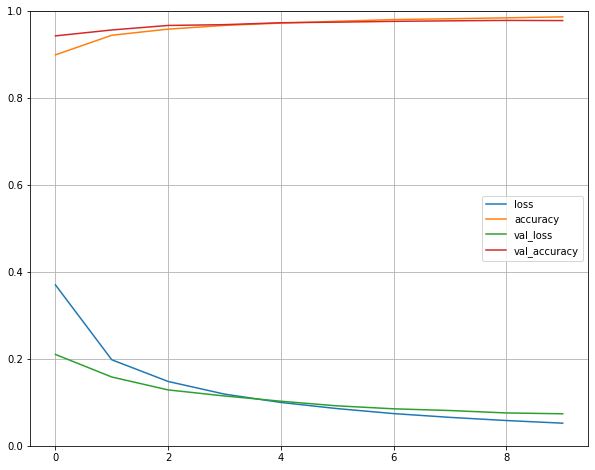

In [16]:
df_losses.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Validation curve e training curve proximas -> baixo risco de overfitting

*O erro do dataset de validação é computado após o treinamento da epoch, enquanto do treino é durante, por isso a curva de validação parece performar melhor que a de treino 

Parametros que podem ser tunados:

- learning rate
- tentar outro optimizer
- numero de camadas, neurons por camadas, tipos de funções de ativação para cada hidden layer
- batch size (padrão 32), que é tunado no fit
- class_weight, caso o dataset seja muito assimetrico (para dar mais peso para classe pouco representada)

In [17]:
final_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 11.9491 - accuracy: 0.9739


[11.94909954071045, 0.9739000201225281]

In [19]:
y_pred = np.argmax(final_model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
print(confusion_matrix(y_test, y_pred))

[[ 973    0    1    1    0    0    0    1    3    1]
 [   0 1124    3    2    0    1    2    0    3    0]
 [   5    2 1007    5    2    0    3    4    4    0]
 [   0    0    2 1002    0    0    0    1    3    2]
 [   2    0    2    2  942    0    4    3    2   25]
 [   7    1    1   27    2  837    8    1    5    3]
 [   9    3    1    1    2    2  935    1    4    0]
 [   2    4    9    8    0    0    0  994    1   10]
 [   3    1    3   10    1    1    2    3  949    1]
 [   4    6    0    9    6    1    0    5    2  976]]


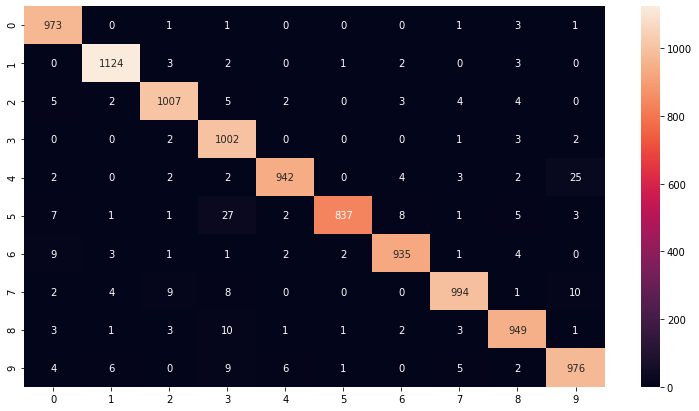

In [22]:
#traditional confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (13,7))
sns.heatmap(df_cm, annot=True, fmt='d')

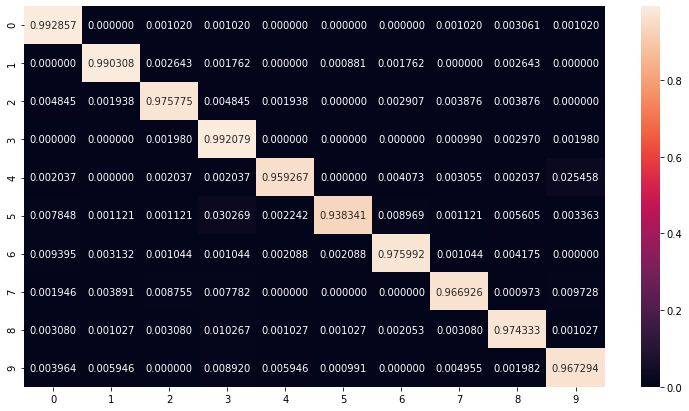

In [26]:
#confusion matrix in accuracy format for each class
cm = confusion_matrix(y_test, y_pred)

df_cm_acc = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])

plt.figure(figsize = (13,7))
sns.heatmap(df_cm_acc, annot=True, fmt='f')

In [24]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print('f1 score:', f1)
print('precision:', precision)
print('recall:', recall)
print('accuracy', accuracy)

f1 score: [0.98035264 0.98769772 0.97719554 0.96485315 0.9726381  0.96539792
 0.97803347 0.97403234 0.97333333 0.96299951]
precision: [0.9681592  0.98510079 0.97862002 0.93908154 0.98638743 0.99406176
 0.98008386 0.98124383 0.97233607 0.95874263]
recall: [0.99285714 0.99030837 0.97577519 0.99207921 0.9592668  0.93834081
 0.97599165 0.96692607 0.97433265 0.96729435]
accuracy 0.9739
